In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.linspace(-1, 1, 25)
t = np.arange(0, 25, 0.05)
D = 0.01
dt = 0.05
dx = 0.08
prob = []
prob.append([0]*len(x))
prob[0][12] = 1
for i in range(t.size):
    prob.append([0]*len(x))
    for pos in range(len(x)):
        if pos == 0 or pos == 24:
            prob[i+1][pos] = 0
            continue
        prob[i+1][pos] = prob[i][pos] + D*dt/(dx**2) * (prob[i][pos+1] + prob[i][pos-1] - 2*prob[i][pos])

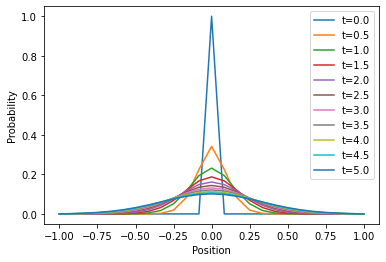

In [11]:
leg = []
for i in range(0, len(prob), 10):
    dist = prob[i]
    if dist[12] > 0.1:
        plt.plot(x, dist)
        leg.append(f"t={t[i]}")
plt.legend(leg)
plt.xlabel("Position")
plt.ylabel("Probability")
plt.show()

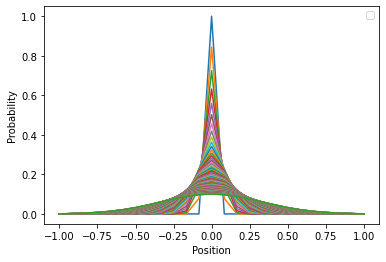

In [12]:
leg = []
for i in range(0, len(prob)):
    dist = prob[i]
    if dist[12] > 0.1:
        plt.plot(x, dist)
plt.legend(leg)
plt.xlabel("Position")
plt.ylabel("Probability")
plt.show()

In [13]:
y = np.linspace(-1, 1, 25)
dy = dx
t = [np.linspace(0, 10, 10), np.linspace(0, 10, 100), np.linspace(0, 10, 1000), np.linspace(0, 10, 10000)]

def plot(Dx, Dy, t):
    prob = [None]*(len(t)+1)
    for i in range(len(t)+1):
        prob[i] = ([np.zeros(25) for j in range(25)])
    prob[0][12][12] = 1

    for i in range(len(t)):
        for j in range(len(x)):
            for k in range(len(y)):
                if j == 0 or j == 24:
                    prob[i+1][k][j] = 0
                    continue
                if k == 0 or k == 24:
                    prob[i+1][k][j] = 0
                    continue
                prob[i+1][k][j] = prob[i][k][j]
                prob[i+1][k][j] += Dx*dt/(dx**2)*(prob[i][k][j+1] + prob[i][k][j-1] - 2*prob[i][k][j])
                prob[i+1][k][j] += Dy*dt/(dy**2)*(prob[i][k+1][j] + prob[i][k-1][j] - 2*prob[i][k][j])
                
    plt.imshow(prob[len(t)], extent = [-1, 1, -1, 1], cmap="inferno")
    if Dx == Dy:
        plt.title(f"equal Dx, Dy and {len(t)} timesteps")
    elif Dx > Dy:
        plt.title(f"Dx greater than Dy and {len(t)} timesteps")
    else:
        plt.title(f"Dy greater than Dx and {len(t)} timestamps")
    plt.show()
    

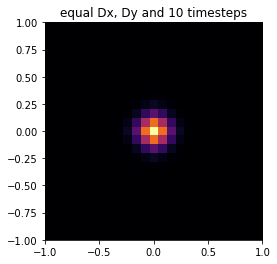

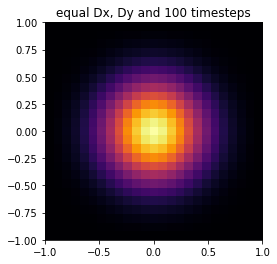

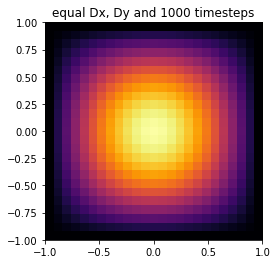

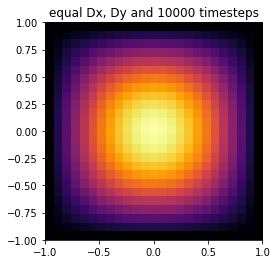

In [14]:
np.seterr('raise')
Dx, Dy = 0.01, 0.01
for ti in t:
    plot(Dx, Dy, ti)

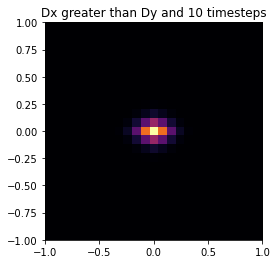

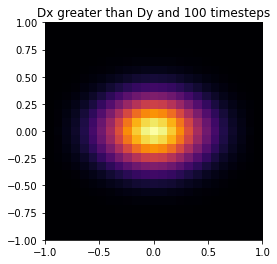

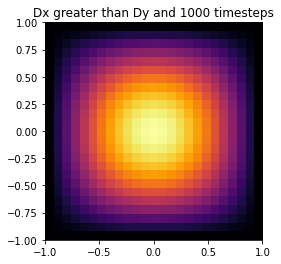

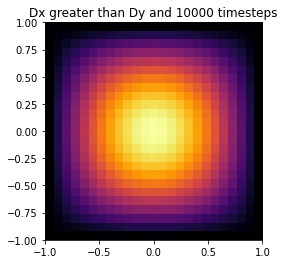

In [15]:
np.seterr('raise')
Dx, Dy = 0.01, 0.005
for ti in t:
    plot(Dx, Dy, ti)

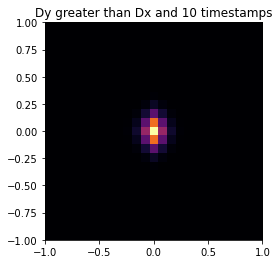

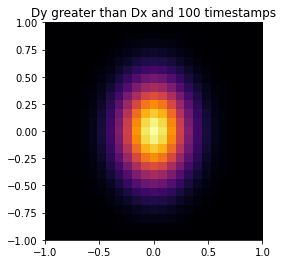

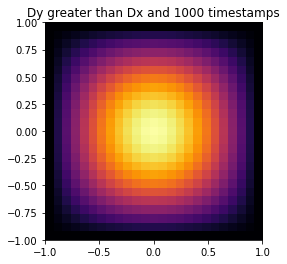

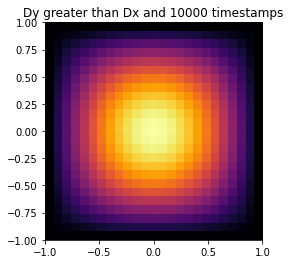

In [16]:
np.seterr('raise')
Dx, Dy = 0.005, 0.01
for ti in t:
    plot(Dx, Dy, ti)